In [1]:
#import basic modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from datetime import timedelta
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

sns.set()

import networkx as nx
import matplotlib.pyplot as plt
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

from nycflights13 import flights

# flights is the combined, tidied data, but can also import individual pieces..
from nycflights13 import airports

# Main Questions

1. Flight Schedule -  What can we say about the recurrent flight schedule? What are recurring patterns
    of variation? Identifying changes or deviance from the recurring behavior.
    
2. Flight Delays -  What are the patterns of flight delays (both short and long)? Can we find potential
    causes for further investigation?

In [2]:
# Try Chartify package for data visualization 

## Graph Critique

### Graph 1 

1. What questions / stories the graphic is trying to answer?


Answer - 
- The graph investigates the percentage of flights delayed (by more than 15 minutes) departing from Denver in 2008. 
- But what are the patterns of flight delays (both short and long)? 
- Is there a relationship between the distance (between the delayed flight’s point of departure & its destination) and the percentage of the delayed flights?



2. Do they answer successfully?

Answer - 

We can say that they do answer successfully to the question, but partially.
Indeed, we observe a strong relationship between the flight distance and the percentage of delayed flights for the two categories: 20-25 % and +25% of the flight departures delayed, we certainly notice that as the flight distance increases, the percentage of delays increases.
But this is no so evident for the categories of <10%, 10-15% and 15-20%.
We can see both short and long-distance flights for those three categories




3. Do they raise new questions not addressed?

Answer - 

We suspect that the relationship between distance flight and departure delay is not so evident: naively, we were expecting for the categories “less of 10%” (green lines), “10-15%” (purple lines) and “15-20%” (blue lines), we will find just short/middle-distance flights but it’s not what the graph exhibits.
Contrary to our claim, we can observe green/blue/purple lines (which represent those categories of low percentage of delayed flights) in:

     -Short-distance flights like flights to Texas, North & South Dakota and others, nearby states to Denver.
    - Long-distance flights (to California or Florida for example).



4. Please suggest one way in which these figures can be improved.

Proposition of another graph: we divide the categories of percentage of delayed departure flights into three:

1. -	Less than 20% 
2. -	 20-25% (orange lines)
3. -	More than 25%


The graph will exhibit better that most of flights of the categories 2&3 are long-distance flights.
No pattern for the first category.
Then, more than focusing on: “Are the distance and the departure delay are correlated?”
, the graph leads us to raise another question: “Why high percentages of delayed flights are especially located for long-distance?”, as proposed by question 3 above 



### Graph 2

1. What questions / stories the graphic is trying to answer?

This graph represents two time-series over the year 2008 (Jan 2008-Jan 2009) 
- The line in blue corresponds to the total of flights per day from Denver (scheduled in departure).
- The line in red refers to the number of flights per day with a departure delay exceeding 15 minutes.
The graph investigates the temporal effects on the two time-series and asks:
- Does the time-series have periodic cycles or trend? 
- Are there periods (days/months/seasons/holidays) in the year with higher total flights or higher departure-delayed flights?


2. Do they answer successfully?



A priori the graph answers successfully to the question:
- The blue line: We can notice that every week has more or less the same trend: 
   most flights on Mondays, Thursdays and Fridays (20000 flights a day in average) and 
    few flights on Saturdays and Sundays (17000 flights per day in average).
    Let’s look more closely at two sudden decreases of the curve of total flights:
    one in the first week of July 2008 and one in the last week of November 2008 corresponding to holidays. 
    The last thing that holds our attention is the decline of total flights which appears in September 2008 because of the economic recession. Beginning from September, we have an average of total flights which varies from 15000 to less than 20000 flights.

-	The red line: The graph represents the number of delayed-departure flights per day.
    Contrary to the blue curve, the red one is not periodic. Until September 2008, we can observe that there is a number of delayed-departure quite important, varying between 1000 and 8000 delayed flights (approximately). A strong decrease of those delays appears in September 2008:
    As the economic crisis breaks out, we have significantly less delayed flights (in departure) on September, October and November. Nevertheless, the number of delays sudden increases in December, which reaches 8000 delayed flights per day for a good part of this month.


3. Do they raise new questions not addressed?
Let us draw your attention to the graph beginning from September 2008:
             
The decline of total flights and of delayed-departure flights leads us to raise a new question: 
        Is this decline an effect of the economic crisis? Or is it a temporal effect and every year, not just in         
        2008, the two time-series have the same pattern and we assist to the same phenomena: decline of   
        total flights for the four last months of the year and a decline of the delayed flights in Sep-Oct-Nov?

-	Both two curves (blue and red) decline together in the end of the year. We can suspect that the ratio/ percentage of the delayed flights in the total flights does not really decreases because of the crisis but because the total flights declined. If the red curve was in percentage and not in discrete values, would we observe such a decline of the delayed flights in September 2008?
    Otherwise, if the percentage of delays indeed decreases in September, other factors should be taken into account: maybe because of the end of summer holidays, companies/airports make more efforts to avoid delays …

-	In December, we assist to a surge of the number of delays, is it a consequence of the workload in the airports with the holiday season? Are there any other factors? Less pilots, less stewards, etc.


4. Would you change them? How?
       We can think to another alternative to this graph that could improves our analyze of the temporal effects on the total flights and the delayed-departure flights per day through the year:

    -	2008 is not an efficient representative example because of the historical economic crisis and maybe a comparison with the graph of 2007 (or even throughout several years) could help to check if the total flights/delayed flights decrease in the end of the year. So that we could draw more reliable conclusions and deduce if this decline is a pattern of the end of every year or just a special case of the year 2008.

    -	Instead of presenting the number of delayed flights by discrete values, exhibiting the curve of the percentages/ ratio of the delayed flights with the number of total flights could be more interesting to check if the decline of delays in the end of year is due to the decline of the total flights or because it is a trend of the end of every year.


In [3]:
flights['Date_DepartureTimeSched']  = pd.to_datetime(flights[['year', 'month', 'day','hour','minute']])

flights = flights[['Date_DepartureTimeSched','dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance']]

In [4]:
flights.head()

,Date_DepartureTimeSched,dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013-01-01 05:15:00,517.0,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400
1,2013-01-01 05:29:00,533.0,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416
2,2013-01-01 05:40:00,542.0,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089
3,2013-01-01 05:45:00,544.0,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576
4,2013-01-01 06:00:00,554.0,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762


In [13]:

NumofFlights = flights.groupby(['origin',
                                'dest']).agg({'air_time':'count'}).reset_index().rename(columns = {'air_time':'NumOfFlights'})
NumofFlightsDelayed15  = flights[flights.dep_delay > 15].groupby(['origin',
                                                                  'dest']).agg({'air_time':'count'}).reset_index().rename(columns = {'air_time':'NumOfFlightsDelayed'})

In [17]:
Merged = pd.merge(NumofFlights,NumofFlightsDelayed15,on=['origin','dest'],how = 'left')

Merged['PercentageDelayed'] = Merged['NumOfFlightsDelayed']/Merged['NumOfFlights']

Merged

,origin,dest,NumOfFlights,NumOfFlightsDelayed,PercentageDelayed
0,EWR,ALB,418,148.0,0.354067
1,EWR,ANC,8,1.0,0.125000
2,EWR,ATL,4876,1087.0,0.222929
3,EWR,AUS,957,200.0,0.208986
4,EWR,AVL,251,51.0,0.203187
...,...,...,...,...,...
219,LGA,SYR,269,76.0,0.282528
220,LGA,TPA,2126,395.0,0.185795
221,LGA,TVC,73,24.0,0.328767
222,LGA,TYS,265,77.0,0.290566


In [57]:
destanations  = list(flights['dest'].unique())
origins = list(NumofFlights['origin'].unique())
airports_coord = origins + destanations
airports_coord = pd.DataFrame(airports_coord,columns=['Ports'])

airports_coord

ports= airports[['faa','lat','lon']]
ports = ports.rename(columns = {'faa':'Ports'})

airports_coord = pd.merge(airports_coord,ports,on = 'Ports',how='left')

airports_coord = airports_coord.fillna(0)

# Record airports that we have no coordinates
missing_coordinates = airports_coord[airports_coord.lat == 0]

In [20]:
airports_coord.head()

,Ports,lat,lon
0,IAH,29.984433,-95.341442
1,MIA,25.793250,-80.290556
2,BQN,0.000000,0.000000
3,ATL,33.636719,-84.428067
4,ORD,41.978603,-87.904842


In [24]:
NumofFlights.head()

,origin,dest,NumOfFlights
0,EWR,ALB,418
1,EWR,ANC,8
2,EWR,ATL,4876
3,EWR,AUS,957
4,EWR,AVL,251


## Graph 1

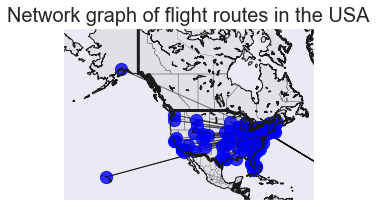

In [69]:
# Create graph
graph = nx.from_pandas_edgelist(NumofFlights, source = 'origin', target = 'dest',
                      edge_attr = 'NumOfFlights',create_using = nx.DiGraph())

# Set up base map
plt.figure(figsize=(5,10))
m = Basemap(
        projection='merc',
        llcrnrlon=-180,
        llcrnrlat=10,
        urcrnrlon=-50,
        urcrnrlat=70,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

# import long lat as m attribute
mx, my = m(airports_coord['lon'].values, airports_coord['lat'].values)
pos = {}
for count, elem in enumerate (airports_coord['Ports']):
    pos[elem] = (mx[count], my[count])

# draw nodes and edges and overly on basemap
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(),node_color = 'blue', alpha = 0.8, node_size = 150)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='black', alpha=0.7, arrows = False)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=1)
m.fillcontinents(alpha = 0.3)
plt.title("Network graph of flight routes in the USA", fontsize = 20)
#m.bluemarble()
plt.tight_layout()
plt.show()

## Graph 2

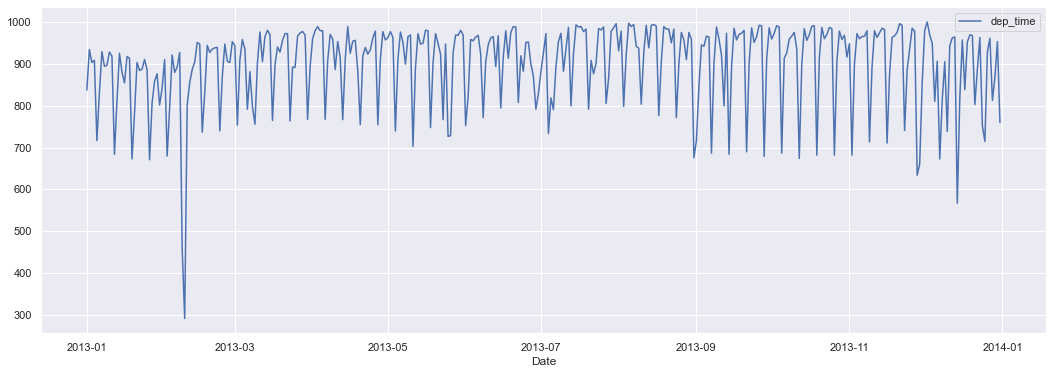

In [75]:
flights['Date'] = flights['Date_DepartureTimeSched'].dt.date

flights.groupby('Date').agg({'dep_time':'count'}).plot(figsize = (18,6))

## Freestyle Analysis

## Graphical Lineup